<a href="https://colab.research.google.com/github/AshHydroCoder/GRACE-Downscaler/blob/Branch1/Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install rioxarray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 40.1 MB/s eta 0:00:00


In [ ]:
import rioxarray
import geopandas as gpd
nepal_shp = gpd.read_file('/content/drive/MyDrive/Thesis/SHP/TrunkKoshi.shp')
nepal_shp = nepal_shp.set_crs('epsg:4326')

In [ ]:
import joblib
model_rf = joblib.load(f'/content/drive/My Drive/Thesis/RFM/k-fold-RFM.pkl')

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
df_pr = pd.read_csv(f'/content/drive/MyDrive/Thesis/RFM/Predictor/combined_csv.csv')

In [ ]:
df_pr

,time,x,y,SM,SWE_inst,precipitation,_1_km_monthly_NDVI,elevation,aspect,RadT_tavg,Evap_tavg,Qs_tavg
0,2003-01-01,84.05,25.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003-01-01,84.05,25.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2003-01-01,84.05,25.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003-01-01,84.05,25.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2003-01-01,84.05,25.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
222763,2023-12-01,87.35,27.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222764,2023-12-01,87.35,27.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222765,2023-12-01,87.35,27.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222766,2023-12-01,87.35,27.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#exclude = ['time', 'x', 'y']
#normalize = df_pr.columns.difference(exclude)
# Normalize only the selected columns
#scaler = MinMaxScaler()
#df_pr_normalized = scaler.fit_transform(df_pr[normalize])

# Create a new DataFrame with normalized data and reattach the excluded columns
#df_pr_normalized = pd.DataFrame(df_pr_normalized, columns=normalize)
#df_X = pd.concat([df_pr[exclude], df_pr_normalized], axis=1)

df_pr['time'] = pd.to_datetime(df_pr['time'])
df_clipped = df_pr[(df_pr['time'].dt.year >= 2003) & (df_pr['time'].dt.year <= 2016)]
df_X = df_clipped.dropna()
#X =df_X.drop(['y','x','time'], axis=1)
order = ['elevation', 'aspect', 'precipitation', 'SM', 'Evap_tavg', 'Qs_tavg', 'RadT_tavg', '_1_km_monthly_NDVI']
#order = ['Evap_tavg', 'aspect','elevation','slope', 'SoilMoi00_10cm_tavg', 'SoilMoi100_200cm_tavg', 'SoilMoi10_40cm_tavg', 'SoilMoi40_100cm_tavg','NDVI', 'precipitation','Qs_tavg','SWE_inst']
X = df_X[order]
X

,elevation,aspect,precipitation,SM,Evap_tavg,Qs_tavg,RadT_tavg,_1_km_monthly_NDVI
20,165.0,199.64822,0.054,0.235285,0.000012,2.459606e-07,287.04530,0.6986
21,297.0,278.17440,0.056,0.262131,0.000016,1.893985e-07,285.99220,0.8581
22,128.0,315.99347,0.055,0.216998,0.000008,8.051922e-08,287.22290,0.0656
43,88.0,177.39743,0.047,0.252867,0.000012,3.515837e-07,287.25726,0.4561
44,93.0,190.81387,0.049,0.244615,0.000011,2.918169e-07,287.27225,0.4570
...,...,...,...,...,...,...,...,...
148473,105.0,209.16473,0.001,0.315109,0.000018,1.801224e-09,291.56308,0.4454
148474,179.0,210.81350,0.001,0.329208,0.000020,1.385861e-11,290.94962,0.8015
148475,842.0,233.38950,0.001,0.287681,0.000020,1.211911e-09,287.95236,0.6384
148500,229.0,188.10120,0.001,0.303732,0.000020,2.531668e-11,290.46066,0.5532


In [ ]:
y_predicted = model_rf.predict(X)


In [ ]:
df_X['lwe_thickness_predict'] = y_predicted
df_X
#df_X.to_csv(f'/content/drive/MyDrive/Thesis/RESULT/DOWNSCALED/DS_NoNormal.csv', index=False)

<ipython-input-8-d3e39754e199>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X['lwe_thickness_predict'] = y_predicted


,time,x,y,SM,SWE_inst,precipitation,_1_km_monthly_NDVI,elevation,aspect,RadT_tavg,Evap_tavg,Qs_tavg,lwe_thickness_predict
20,2003-01-01,84.05,27.35,0.235285,0.0,0.054,0.6986,165.0,199.64822,287.04530,0.000012,2.459606e-07,10.711068
21,2003-01-01,84.05,27.45,0.262131,0.0,0.056,0.8581,297.0,278.17440,285.99220,0.000016,1.893985e-07,7.437736
22,2003-01-01,84.05,27.55,0.216998,0.0,0.055,0.0656,128.0,315.99347,287.22290,0.000008,8.051922e-08,9.242695
43,2003-01-01,84.15,27.05,0.252867,0.0,0.047,0.4561,88.0,177.39743,287.25726,0.000012,3.515837e-07,12.922299
44,2003-01-01,84.15,27.15,0.244615,0.0,0.049,0.4570,93.0,190.81387,287.27225,0.000011,2.918169e-07,12.735659
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148473,2016-12-01,87.25,26.65,0.315109,0.0,0.001,0.4454,105.0,209.16473,291.56308,0.000018,1.801224e-09,-10.169327
148474,2016-12-01,87.25,26.75,0.329208,0.0,0.001,0.8015,179.0,210.81350,290.94962,0.000020,1.385861e-11,-5.637938
148475,2016-12-01,87.25,26.85,0.287681,0.0,0.001,0.6384,842.0,233.38950,287.95236,0.000020,1.211911e-09,-13.334877
148500,2016-12-01,87.35,26.75,0.303732,0.0,0.001,0.5532,229.0,188.10120,290.46066,0.000020,2.531668e-11,-7.829436


# Export to nc file

In [ ]:
import xarray as xr
import pandas as pd

# Convert dataframe to xarray Dataset
ds = xr.Dataset.from_dataframe(df_X.set_index(['time', 'y', 'x']))

# Export to NetCDF
ds.to_netcdf(f'/content/drive/MyDrive/Thesis/RESULT/DOWNSCALED/GRACE_0.1_CV.nc')


# Visualize predicted model

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
GR = xr.open_dataset('/content/drive/MyDrive/Thesis/RAW/GRACE_GSB.nc')
#GR = GR.drop_vars('time_bounds')
GR = GR.rio.write_crs('epsg:4326')
GR = GR.rename({'lon':'x','lat':'y'})
GR = GR.rio.clip(nepal_shp.geometry,all_touched=True)
GR = GR.drop_vars('spatial_ref')
GR = GR.drop_vars('WGS84')
GR = GR.sel(time=slice('2003-01-01','2016-12-31'))

In [ ]:
GR

<xarray.Dataset> Size: 94kB
Dimensions:        (x: 14, y: 11, time: 151)
Coordinates:
  * x              (x) float32 56B 84.12 84.38 84.62 84.88 ... 86.88 87.12 87.38
  * y              (y) float32 44B 25.38 25.62 25.88 26.12 ... 27.38 27.62 27.88
  * time           (time) datetime64[ns] 1kB 2003-01-16T12:00:00 ... 2016-12-...
Data variables:
    lwe_thickness  (time, y, x) float32 93kB nan nan nan nan ... nan nan nan nan
Attributes: (12/59)
    Conventions:                CF-1.6, ACDD-1.3, ISO 8601
    filename:                   netcdf/CSR_GRACE_GRACE-FO_RL0603_Mascons_all-...
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    title:                      CSR GRACE and GRACE-FO MASCON RL0603M
    subtitle:                   RL06.2 GRACE/GRACE-FO Total water storage wit...
    ...                         ...
    user_note_3:                Ellipsoidal correction has been applied. The ...
    user_note_4:                This GRACE-FO RL06.2 data is an updated versi...
    date_created:               2025-01-06T11:43:54Z
    variable:                   liquid water equivalent thickness
    label:                      RL0603rc24cE
    Mask:                       Global

<ipython-input-11-5f87f8077f38>:18: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  ax.plot(mean_df.index, trendline, linestyle='--', color='g', label=f"Sen's Slope (Slope: {sen_slope:.4f})")


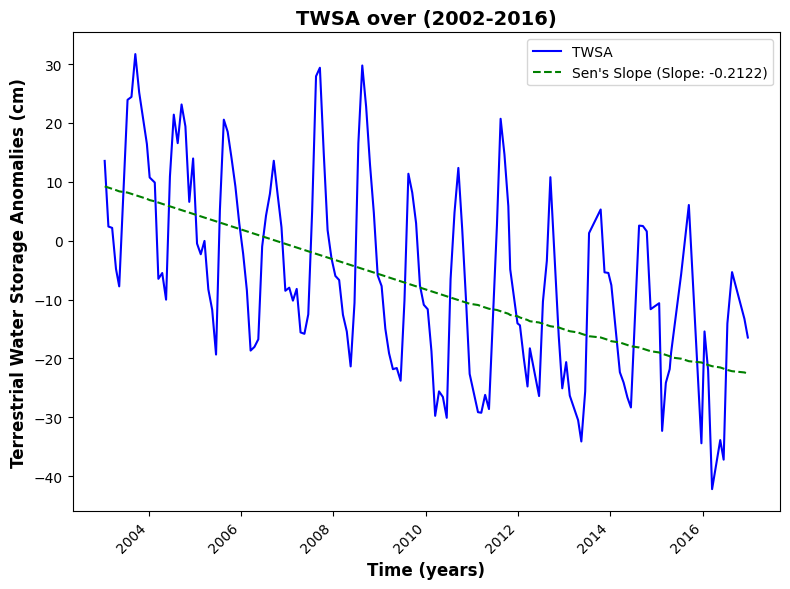

Sen's Slope: -0.2122
95% Confidence Interval: (-0.2672, -0.1598)


In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
mean = GR.mean(dim = ['y','x'])
mean_df = mean.to_dataframe()
x = np.arange(len(mean_df))
y = mean_df['lwe_thickness'].values

# Calculate Sen's slope using Theil-Sen estimator
sen_slope, intercept, lower_slope, upper_slope = stats.theilslopes(y, x)

# Plot the original data
fig, ax = plt.subplots(figsize=(8, 6))
mean_df['lwe_thickness'].plot(ax=ax, marker='', linestyle='-', color='b', label='TWSA')

# Plot Sen's slope trendline
trendline = sen_slope * x + intercept
ax.plot(mean_df.index, trendline, linestyle='--', color='g', label=f"Sen's Slope (Slope: {sen_slope:.4f})")

# Customize the plot
ax.set_xlabel('Time (years)', fontsize=12, fontweight='bold')
ax.set_ylabel('Terrestrial Water Storage Anomalies (cm)', fontsize=12, fontweight='bold')
ax.set_title(f"TWSA over (2002-2016)", fontsize=14, fontweight='bold')
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

# Print Sen's slope and confidence interval
print(f"Sen's Slope: {sen_slope:.4f}")
print(f"95% Confidence Interval: ({lower_slope:.4f}, {upper_slope:.4f})")

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
GR_DS = xr.open_dataset('/content/drive/MyDrive/Thesis/RESULT/DOWNSCALED/GRACE_0.1_CV.nc')
#GR_DS = xr.open_dataset('/content/drive/MyDrive/Thesis/RESULT/DOWNSCALED/GRACE_0.1.nc')
GR_DS = GR_DS.rio.write_crs('epsg:4326')
GR_DS = GR_DS.sel(time=slice('2003-01-01','2016-12-31'))

In [ ]:
GR_DS

<xarray.Dataset> Size: 12MB
Dimensions:                (time: 168, y: 26, x: 34)
Coordinates:
  * time                   (time) datetime64[ns] 1kB 2003-01-01 ... 2016-12-01
  * x                      (x) float64 272B 84.05 84.15 84.25 ... 87.25 87.35
  * y                      (y) float64 208B 25.35 25.45 25.55 ... 27.75 27.85
    spatial_ref            int64 8B 0
Data variables:
    SM                     (time, y, x) float64 1MB nan nan nan ... nan nan nan
    SWE_inst               (time, y, x) float64 1MB nan nan nan ... nan nan nan
    precipitation          (time, y, x) float64 1MB nan nan nan ... nan nan nan
    _1_km_monthly_NDVI     (time, y, x) float64 1MB nan nan nan ... nan nan nan
    elevation              (time, y, x) float64 1MB nan nan nan ... nan nan nan
    aspect                 (time, y, x) float64 1MB nan nan nan ... nan nan nan
    RadT_tavg              (time, y, x) float64 1MB nan nan nan ... nan nan nan
    Evap_tavg              (time, y, x) float64 1MB nan nan nan ... nan nan nan
    Qs_tavg                (time, y, x) float64 1MB nan nan nan ... nan nan nan
    lwe_thickness_predict  (time, y, x) float64 1MB nan nan nan ... nan nan nan

<ipython-input-19-b25faf7aacc0>:18: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  ax.plot(mean_ds_df.index, trendline, linestyle='--', color='g', label=f"Sen's Slope (Slope: {sen_slope:.4f})")


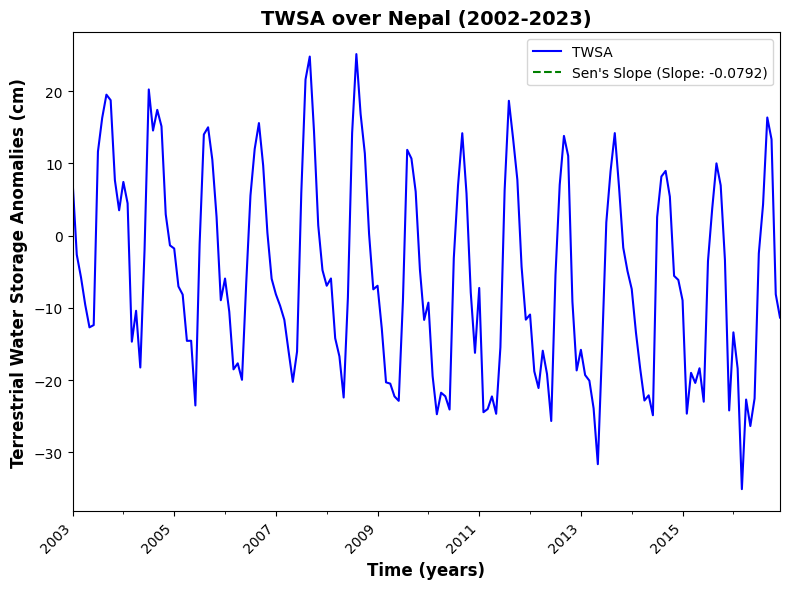

Sen's Slope: -0.0792
95% Confidence Interval: (-0.1232, -0.0379)


In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
mean_ds = GR_DS.mean(dim = ['y','x'])
mean_ds_df = mean_ds.to_dataframe()
x = np.arange(len(mean_ds_df))
y = mean_ds_df['lwe_thickness_predict'].values

# Calculate Sen's slope using Theil-Sen estimator
sen_slope, intercept, lower_slope, upper_slope = stats.theilslopes(y, x)

# Plot the original data
fig, ax = plt.subplots(figsize=(8, 6))
mean_ds_df['lwe_thickness_predict'].plot(ax=ax, marker='', linestyle='-', color='b', label='TWSA')

# Plot Sen's slope trendline
trendline = sen_slope * x + intercept
ax.plot(mean_ds_df.index, trendline, linestyle='--', color='g', label=f"Sen's Slope (Slope: {sen_slope:.4f})")

# Customize the plot
ax.set_xlabel('Time (years)', fontsize=12, fontweight='bold')
ax.set_ylabel('Terrestrial Water Storage Anomalies (cm)', fontsize=12, fontweight='bold')
ax.set_title("TWSA over Nepal (2002-2023)", fontsize=14, fontweight='bold')
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

# Print Sen's slope and confidence interval
print(f"Sen's Slope: {sen_slope:.4f}")
print(f"95% Confidence Interval: ({lower_slope:.4f}, {upper_slope:.4f})")

KeyboardInterrupt: 

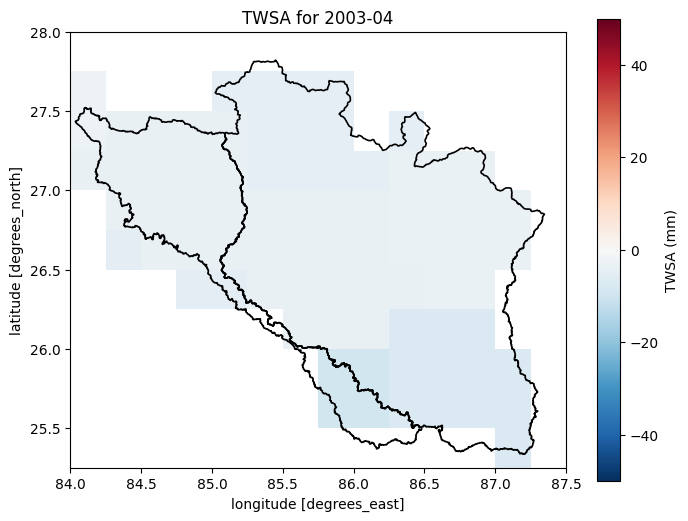

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

# Set the minimum and maximum values for the color scale
vmin, vmax = -50, 50

# Create an output directory
output_folder = "/content/drive/MyDrive/Thesis/RESULT/ORIGINAL"
os.makedirs(output_folder, exist_ok=True)

# Plot each month with the shapefile overlay and save the plots
for time_point in GR.time.values:
    # Select data for the current time point
    data_slice = GR.sel(time=time_point)['lwe_thickness']

    # Plot the data
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot the raster data
    data_slice.plot(
        ax=ax,
        cmap='RdBu_r',
        vmin=vmin,
        vmax=vmax,
        cbar_kwargs={'label': 'TWSA (mm)'}
    )

    # Plot the shapefile as a boundary
    nepal_shp.boundary.plot(ax=ax, color='black', linewidth=1.2)

    # Set title
    title = f"TWSA for {np.datetime_as_string(time_point, unit='M')}"
    ax.set_title(title)

    # Save the figure
    filename = os.path.join(output_folder, f"{title.replace(' ', '_').replace(':', '-')}.png")
    plt.savefig(filename, dpi=300, bbox_inches='tight')

    plt.close(fig)  # Close the figure after saving

print(f"Plots saved to folder: {output_folder}")





In [ ]:

import os
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

# Set the minimum and maximum values for the color scale
vmin, vmax = -50, 50

# Create an output directory
output_folder = "/content/drive/MyDrive/Thesis/RESULT/DOWNSCALED_IMAGES"
os.makedirs(output_folder, exist_ok=True)

# Plot each month with the shapefile overlay and save the plots
for time_point in GR_DS.time.values:
    # Select data for the current time point
    data_slice = GR_DS.sel(time=time_point)['lwe_thickness_predict']

    # Plot the data
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot the raster data
    data_slice.plot(
        ax=ax,
        cmap='RdBu_r',
        vmin=vmin,
        vmax=vmax,
        cbar_kwargs={'label': 'TWSA (mm)'}
    )

    # Plot the shapefile as a boundary
    nepal_shp.boundary.plot(ax=ax, color='black', linewidth=1.2)

    # Set title
    title = f"TWSA for {np.datetime_as_string(time_point, unit='D')}"
    ax.set_title(title)

    # Save the figure
    filename = os.path.join(output_folder, f"{title.replace(' ', '_').replace(':', '-')}.png")
    plt.savefig(filename, dpi=300, bbox_inches='tight')

    plt.close(fig)  # Close the figure after saving

print(f"Plots saved to folder: {output_folder}")


Plots saved to folder: /content/drive/MyDrive/Thesis/RESULT/DOWNSCALED_IMAGES


<ipython-input-25-423dc89a757c>:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df1 = df1.resample("M").mean()
<ipython-input-25-423dc89a757c>:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2 = df2.resample("M").mean()


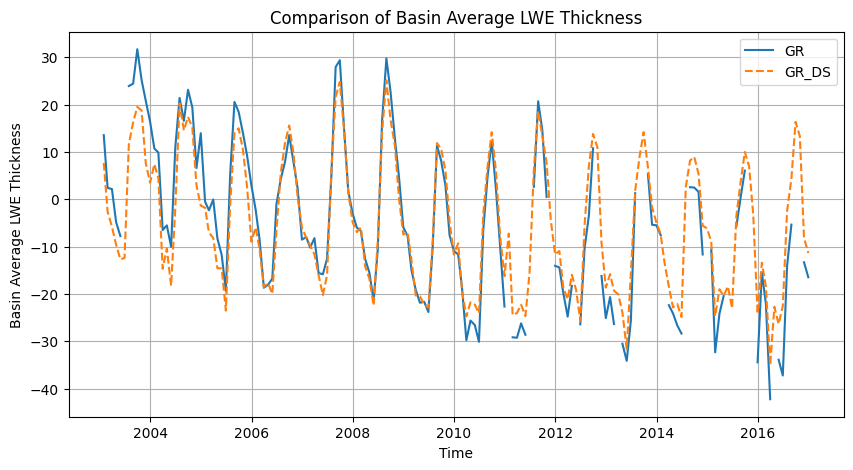

In [ ]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Load your datasets

# Extract the variables
var1 = GR["lwe_thickness"]
var2 = GR_DS["lwe_thickness_predict"]

# Compute the spatial mean (basin average)
basin_avg1 = var1.mean(dim=["x", "y"])  # Adjust dims if different
basin_avg2 = var2.mean(dim=["x", "y"])

# Convert to Pandas DataFrame for easy handling
df1 = basin_avg1.to_dataframe().dropna()
df2 = basin_avg2.to_dataframe().dropna()

# Convert to monthly averages to align them
df1 = df1.resample("M").mean()
df2 = df2.resample("M").mean()

# Merge the datasets on time index
df = df1.join(df2, how="inner")  # 'inner' ensures only common months are kept

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["lwe_thickness"], label="GR")
plt.plot(df.index, df["lwe_thickness_predict"], label="GR_DS", linestyle="--")
plt.xlabel("Time")
plt.ylabel("Basin Average LWE Thickness")
plt.title("Comparison of Basin Average LWE Thickness")
plt.legend()
plt.grid()
plt.show()

<ipython-input-26-15ded280e103>:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df1 = df1.resample("M").mean()
<ipython-input-26-15ded280e103>:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2 = df2.resample("M").mean()


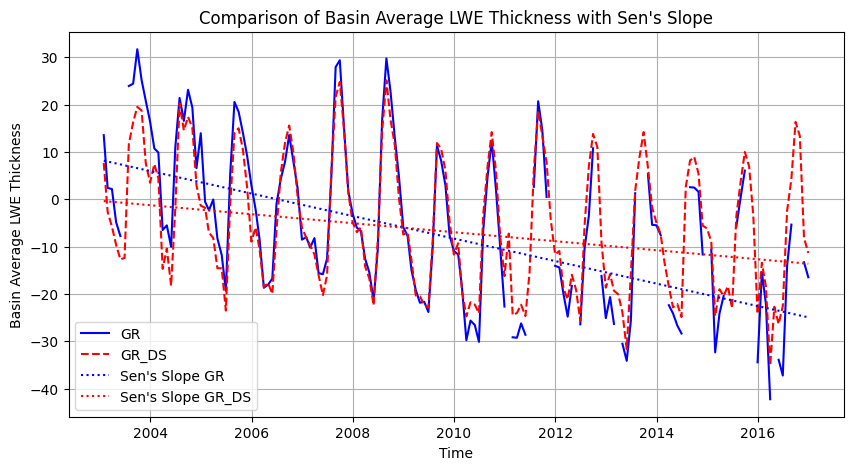

In [ ]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import theilslopes

# Compute the spatial mean (basin average)
basin_avg1 = GR["lwe_thickness"].mean(dim=["x", "y"])
basin_avg2 = GR_DS["lwe_thickness_predict"].mean(dim=["x", "y"])

# Convert to Pandas DataFrame
df1 = basin_avg1.to_dataframe().dropna()
df2 = basin_avg2.to_dataframe().dropna()

# Resample to monthly means
df1 = df1.resample("M").mean()
df2 = df2.resample("M").mean()

# Merge datasets on time index
df = df1.join(df2, how="inner")

# Extract time as numerical values for trend analysis
time_numeric = (df.index - df.index[0]).days  # Convert to days since start

# Compute Sen’s slope for each dataset
slope1, intercept1, _, _ = theilslopes(df["lwe_thickness"].dropna(), time_numeric[df["lwe_thickness"].notna()])
slope2, intercept2, _, _ = theilslopes(df["lwe_thickness_predict"].dropna(), time_numeric[df["lwe_thickness_predict"].notna()])

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["lwe_thickness"], label="GR", color="blue")
plt.plot(df.index, df["lwe_thickness_predict"], label="GR_DS", linestyle="--", color="red")

# Add Sen's slope trend lines
plt.plot(df.index, slope1 * time_numeric + intercept1, color="blue", linestyle="dotted", label="Sen's Slope GR")
plt.plot(df.index, slope2 * time_numeric + intercept2, color="red", linestyle="dotted", label="Sen's Slope GR_DS")

plt.xlabel("Time")
plt.ylabel("Basin Average LWE Thickness")
plt.title("Comparison of Basin Average LWE Thickness with Sen's Slope")
plt.legend()
plt.grid()
plt.show()



# Residual Correction

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
GR_DS = xr.open_dataset('/content/drive/MyDrive/Thesis/RESULT/DOWNSCALED/GRACE_0.1_CV.nc')
#GR_DS = xr.open_dataset('/content/drive/MyDrive/Thesis/RESULT/DOWNSCALED/GRACE_0.1.nc')
GR_DS = GR_DS.rio.write_crs('epsg:4326')
GR_DS = GR_DS.sel(time=slice('2003-01-01','2016-12-31'))

In [ ]:
grace_nc ='/content/drive/MyDrive/Thesis/RAW/GRACE_GSB.nc'
G_dataset = xr.open_dataset(grace_nc)
months_missing = G_dataset.attrs.get('months_missing', 'Attribute not found')
dates = months_missing.replace(",", ";").split(";")
missing_dates = [(int(date.split("-")[0]), int(date.split("-")[1])) for date in dates]
missing_dates = [pd.Timestamp(year=year, month=month, day=1) for year, month in missing_dates]
#print(missing_dates)
#G_dataset_clip = G_dataset.sel(time=slice('2003-02-01','2020-12-31'))
#G_dataset_clip = G_dataset_clip[['lwe_thickness']]
#df1 = G_dataset_clip.to_dataframe().reset_index()
# Export to CSV
#df1.to_csv('D:/Masters/Thesis/Data/RFM/'+what+'.csv', index=False)
missing_dates

[Timestamp('2002-06-01 00:00:00'),
 Timestamp('2002-07-01 00:00:00'),
 Timestamp('2003-06-01 00:00:00'),
 Timestamp('2011-01-01 00:00:00'),
 Timestamp('2011-06-01 00:00:00'),
 Timestamp('2012-05-01 00:00:00'),
 Timestamp('2012-10-01 00:00:00'),
 Timestamp('2013-03-01 00:00:00'),
 Timestamp('2013-08-01 00:00:00'),
 Timestamp('2013-09-01 00:00:00'),
 Timestamp('2014-02-01 00:00:00'),
 Timestamp('2014-07-01 00:00:00'),
 Timestamp('2014-12-01 00:00:00'),
 Timestamp('2015-06-01 00:00:00'),
 Timestamp('2015-10-01 00:00:00'),
 Timestamp('2015-11-01 00:00:00'),
 Timestamp('2016-04-01 00:00:00'),
 Timestamp('2016-09-01 00:00:00'),
 Timestamp('2016-10-01 00:00:00'),
 Timestamp('2017-02-01 00:00:00'),
 Timestamp('2017-02-01 00:00:00'),
 Timestamp('2017-07-01 00:00:00'),
 Timestamp('2017-08-01 00:00:00'),
 Timestamp('2017-09-01 00:00:00'),
 Timestamp('2017-10-01 00:00:00'),
 Timestamp('2017-11-01 00:00:00'),
 Timestamp('2017-12-01 00:00:00'),
 Timestamp('2018-01-01 00:00:00'),
 Timestamp('2018-02-

In [ ]:
time_index = pd.to_datetime(GR_DS['time'].values)
mask = pd.Series(True, index=time_index)  # Start with all True (include all data)

for timestamp in missing_dates:
    year = timestamp.year
    month = timestamp.month
    # Exclude dates that match the missing year and month
    mask &= ~((time_index.year == year) & (time_index.month == month))

    # Exclude dates that match the missing year and month
    mask &= ~((time_index.year == year) & (time_index.month == month))

# Apply the mask to filter the dataset
GR_DS = GR_DS.sel(time=mask[mask].index)

In [ ]:
GR_DS

<xarray.Dataset> Size: 11MB
Dimensions:                (time: 151, y: 26, x: 34)
Coordinates:
  * time                   (time) datetime64[ns] 1kB 2003-01-01 ... 2016-12-01
  * x                      (x) float64 272B 84.05 84.15 84.25 ... 87.25 87.35
  * y                      (y) float64 208B 25.35 25.45 25.55 ... 27.75 27.85
    spatial_ref            int64 8B 0
Data variables:
    SM                     (time, y, x) float64 1MB ...
    SWE_inst               (time, y, x) float64 1MB ...
    precipitation          (time, y, x) float64 1MB ...
    _1_km_monthly_NDVI     (time, y, x) float64 1MB ...
    elevation              (time, y, x) float64 1MB ...
    aspect                 (time, y, x) float64 1MB ...
    RadT_tavg              (time, y, x) float64 1MB ...
    Evap_tavg              (time, y, x) float64 1MB ...
    Qs_tavg                (time, y, x) float64 1MB ...
    lwe_thickness_predict  (time, y, x) float64 1MB ...

In [ ]:
regrid_lat = np.arange(25.375,28.125,0.25)
regrid_lon = np.arange(84.125,87.625,0.25)
GR_DS_RE = GR_DS.interp(x=regrid_lon,y = regrid_lat,method='slinear')
GR_DS_RE

<xarray.Dataset> Size: 2MB
Dimensions:                (time: 151, y: 11, x: 14)
Coordinates:
  * time                   (time) datetime64[ns] 1kB 2003-01-01 ... 2016-12-01
    spatial_ref            int64 8B 0
  * x                      (x) float64 112B 84.12 84.38 84.62 ... 87.12 87.38
  * y                      (y) float64 88B 25.38 25.62 25.88 ... 27.62 27.88
Data variables:
    SM                     (time, y, x) float64 186kB nan nan nan ... nan nan
    SWE_inst               (time, y, x) float64 186kB nan nan nan ... nan nan
    precipitation          (time, y, x) float64 186kB nan nan nan ... nan nan
    _1_km_monthly_NDVI     (time, y, x) float64 186kB nan nan nan ... nan nan
    elevation              (time, y, x) float64 186kB nan nan nan ... nan nan
    aspect                 (time, y, x) float64 186kB nan nan nan ... nan nan
    RadT_tavg              (time, y, x) float64 186kB nan nan nan ... nan nan
    Evap_tavg              (time, y, x) float64 186kB nan nan nan ... nan nan
    Qs_tavg                (time, y, x) float64 186kB nan nan nan ... nan nan
    lwe_thickness_predict  (time, y, x) float64 186kB nan nan nan ... nan nan

In [ ]:
predicted = GR_DS_RE['lwe_thickness_predict']
actual = GR['lwe_thickness']

In [ ]:
predicted

<xarray.DataArray 'lwe_thickness_predict' (time: 151, y: 11, x: 14)> Size: 186kB
array([[[         nan,          nan,          nan, ...,  -5.30949551,
          -3.58468611,          nan],
        [         nan,          nan,          nan, ...,  -3.30116401,
          -1.94810026,          nan],
        [         nan,          nan,          nan, ...,  -0.94438905,
           1.35406164,          nan],
        ...,
        [  9.57327805,          nan,   9.70288814, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]],

       [[         nan,          nan,          nan, ...,  -2.37101198,
         -10.16827591,          nan],
        [         nan,          nan,          nan, ...,   0.75404727,
          -4.98475499,          nan],
        [         nan,          nan,          nan, ...,  -1.81503214,
          -3.01959224,          nan],
...
        [ -4.44887802,          nan,  -5.33407757, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]],

       [[         nan,          nan,          nan, ..., -12.30790169,
         -10.87257401,          nan],
        [         nan,          nan,          nan, ..., -10.83190507,
         -12.22991372,          nan],
        [         nan,          nan,          nan, ..., -11.28050661,
         -13.41957084,          nan],
        ...,
        [ -5.91124659,          nan,  -6.85310147, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]]])
Coordinates:
  * time         (time) datetime64[ns] 1kB 2003-01-01 2003-02-01 ... 2016-12-01
    spatial_ref  int64 8B 0
  * x            (x) float64 112B 84.12 84.38 84.62 84.88 ... 86.88 87.12 87.38
  * y            (y) float64 88B 25.38 25.62 25.88 26.12 ... 27.38 27.62 27.88

In [ ]:
actual

<xarray.DataArray 'lwe_thickness' (time: 151, y: 11, x: 14)> Size: 93kB
array([[[        nan,         nan,         nan, ...,         nan,
          11.686213 ,         nan],
        [        nan,         nan,         nan, ...,  11.686213 ,
          11.686213 ,         nan],
        [        nan,         nan,         nan, ...,  11.686213 ,
          11.686213 ,         nan],
        ...,
        [  7.766859 ,  13.324355 ,  13.324355 , ...,         nan,
                 nan,         nan],
        [  7.766859 ,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
           1.724404 ,         nan],
        [        nan,         nan,         nan, ...,   1.724404 ,
           1.724404 ,         nan],
        [        nan,         nan,         nan, ...,   1.724404 ,
           1.724404 ,         nan],
...
        [ -3.1112585,  -6.917934 ,  -6.917934 , ...,         nan,
                 nan,         nan],
        [ -3.1112585,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
         -16.726555 ,         nan],
        [        nan,         nan,         nan, ..., -16.726555 ,
         -16.726555 ,         nan],
        [        nan,         nan,         nan, ..., -16.726555 ,
         -16.726555 ,         nan],
        ...,
        [-19.961483 , -14.054129 , -14.054129 , ...,         nan,
                 nan,         nan],
        [-19.961483 ,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
  * x        (x) float32 56B 84.12 84.38 84.62 84.88 ... 86.62 86.88 87.12 87.38
  * y        (y) float32 44B 25.38 25.62 25.88 26.12 ... 27.12 27.38 27.62 27.88
  * time     (time) datetime64[ns] 1kB 2003-01-16T12:00:00 ... 2016-12-24T12:...
Attributes:
    standard_name:  Liquid_Water_Equivalent_Thickness
    long_name:      Liquid_Water_Equivalent_Thickness
    Units:          cm

In [ ]:
# Convert to DataFrame
df_pred = predicted.to_dataframe()
df_actual = actual.to_dataframe()

In [ ]:
df_pred

,time,y,x,spatial_ref,lwe_thickness_predict
0,2003-01-01,25.375,84.125,0,NaN
1,2003-01-01,25.375,84.375,0,NaN
2,2003-01-01,25.375,84.625,0,NaN
3,2003-01-01,25.375,84.875,0,NaN
4,2003-01-01,25.375,85.125,0,NaN
...,...,...,...,...,...
23249,2016-12-01,27.875,86.375,0,NaN
23250,2016-12-01,27.875,86.625,0,NaN
23251,2016-12-01,27.875,86.875,0,NaN
23252,2016-12-01,27.875,87.125,0,NaN


In [ ]:
df_actual

lwe_thickness
time                y      x                    
2003-01-16 12:00:00 25.375 84.125            NaN
                           84.375            NaN
                           84.625            NaN
                           84.875            NaN
                           85.125            NaN
...                                          ...
2016-12-24 12:00:00 27.875 86.375            NaN
                           86.625            NaN
                           86.875            NaN
                           87.125            NaN
                           87.375            NaN

[23254 rows x 1 columns]

In [ ]:
df_pred = df_pred.reset_index(drop=True)
df_actual = df_actual.reset_index(drop=True)
# Concatenate the DataFrames side by side
df_combined = pd.concat([df_pred, df_actual], axis=1)
df_combined

,time,y,x,spatial_ref,lwe_thickness_predict,time,y,x,lwe_thickness
0,2003-01-01,25.375,84.125,0,NaN,2003-01-16 12:00:00,25.375,84.125,NaN
1,2003-01-01,25.375,84.375,0,NaN,2003-01-16 12:00:00,25.375,84.375,NaN
2,2003-01-01,25.375,84.625,0,NaN,2003-01-16 12:00:00,25.375,84.625,NaN
3,2003-01-01,25.375,84.875,0,NaN,2003-01-16 12:00:00,25.375,84.875,NaN
4,2003-01-01,25.375,85.125,0,NaN,2003-01-16 12:00:00,25.375,85.125,NaN
...,...,...,...,...,...,...,...,...,...
23249,2016-12-01,27.875,86.375,0,NaN,2016-12-24 12:00:00,27.875,86.375,NaN
23250,2016-12-01,27.875,86.625,0,NaN,2016-12-24 12:00:00,27.875,86.625,NaN
23251,2016-12-01,27.875,86.875,0,NaN,2016-12-24 12:00:00,27.875,86.875,NaN
23252,2016-12-01,27.875,87.125,0,NaN,2016-12-24 12:00:00,27.875,87.125,NaN


In [ ]:
df_combined["difference"] = df_combined["lwe_thickness_predict"] - df_combined["lwe_thickness"]
df_combined

,time,y,x,spatial_ref,lwe_thickness_predict,time,y,x,lwe_thickness,difference
0,2003-01-01,25.375,84.125,0,NaN,2003-01-16 12:00:00,25.375,84.125,NaN,NaN
1,2003-01-01,25.375,84.375,0,NaN,2003-01-16 12:00:00,25.375,84.375,NaN,NaN
2,2003-01-01,25.375,84.625,0,NaN,2003-01-16 12:00:00,25.375,84.625,NaN,NaN
3,2003-01-01,25.375,84.875,0,NaN,2003-01-16 12:00:00,25.375,84.875,NaN,NaN
4,2003-01-01,25.375,85.125,0,NaN,2003-01-16 12:00:00,25.375,85.125,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
23249,2016-12-01,27.875,86.375,0,NaN,2016-12-24 12:00:00,27.875,86.375,NaN,NaN
23250,2016-12-01,27.875,86.625,0,NaN,2016-12-24 12:00:00,27.875,86.625,NaN,NaN
23251,2016-12-01,27.875,86.875,0,NaN,2016-12-24 12:00:00,27.875,86.875,NaN,NaN
23252,2016-12-01,27.875,87.125,0,NaN,2016-12-24 12:00:00,27.875,87.125,NaN,NaN


In [ ]:
df_selected = df_combined.iloc[:, [0, 1, 2, 9]]
residual = df_selected.set_index(["time", "y", "x"]).to_xarray()

# Display the xarray dataset
print(residual)

<xarray.Dataset> Size: 187kB
Dimensions:     (time: 151, y: 11, x: 14)
Coordinates:
  * time        (time) datetime64[ns] 1kB 2003-01-01 2003-02-01 ... 2016-12-01
  * y           (y) float64 88B 25.38 25.62 25.88 26.12 ... 27.38 27.62 27.88
  * x           (x) float64 112B 84.12 84.38 84.62 84.88 ... 86.88 87.12 87.38
Data variables:
    difference  (time, y, x) float64 186kB nan nan nan nan ... nan nan nan nan


In [ ]:
regrid_lat = np.arange(25.35,27.95,0.1)
regrid_lon = np.arange(84.05,87.40,0.1)
#residual at 0.1 degree
residual1 = residual.interp(x=regrid_lon,y = regrid_lat,method='slinear')
residual1

<xarray.Dataset> Size: 1MB
Dimensions:     (time: 151, y: 26, x: 34)
Coordinates:
  * time        (time) datetime64[ns] 1kB 2003-01-01 2003-02-01 ... 2016-12-01
  * x           (x) float64 272B 84.05 84.15 84.25 84.35 ... 87.15 87.25 87.35
  * y           (y) float64 208B 25.35 25.45 25.55 25.65 ... 27.65 27.75 27.85
Data variables:
    difference  (time, y, x) float64 1MB nan nan nan nan nan ... nan nan nan nan

In [ ]:
import xarray as xr
import pandas as pd
import numpy as np

# Ensure residual1 has time as a Pandas datetime index
existing_dates = pd.to_datetime(residual1.time.values)

# Identify missing dates that are not in residual1
missing_dates_to_add = [date for date in missing_dates if date not in existing_dates]

# If there are missing dates, create a dataset filled with NaN
if missing_dates_to_add:
    # Create a DataFrame with NaN values for missing dates
    df_missing = pd.DataFrame({"time": missing_dates_to_add})
    df_missing["difference"] = np.nan  # Assign NaN to the 'difference' variable

    # Convert to xarray, maintaining the structure of residual1
    ds_missing = df_missing.set_index("time").to_xarray()

    # Concatenate the original dataset with the missing values dataset
    residual1 = xr.concat([residual1, ds_missing], dim="time")

    # Sort by time to maintain chronological order
    residual1 = residual1.sortby("time")

# Display the updated xarray dataset
residual1 = residual1.sel(time=slice('2003-01-01','2016-12-31'))
residual1


<xarray.Dataset> Size: 1MB
Dimensions:     (time: 168, y: 26, x: 34)
Coordinates:
  * time        (time) datetime64[ns] 1kB 2003-01-01 2003-02-01 ... 2016-12-01
  * x           (x) float64 272B 84.05 84.15 84.25 84.35 ... 87.15 87.25 87.35
  * y           (y) float64 208B 25.35 25.45 25.55 25.65 ... 27.65 27.75 27.85
Data variables:
    difference  (time, y, x) float64 1MB nan nan nan nan nan ... nan nan nan nan

In [ ]:
residual_df = residual1.to_dataframe().reset_index()
residual_df

,time,y,x,difference
0,2003-01-01,25.35,84.05,NaN
1,2003-01-01,25.35,84.15,NaN
2,2003-01-01,25.35,84.25,NaN
3,2003-01-01,25.35,84.35,NaN
4,2003-01-01,25.35,84.45,NaN
...,...,...,...,...
148507,2016-12-01,27.85,86.95,NaN
148508,2016-12-01,27.85,87.05,NaN
148509,2016-12-01,27.85,87.15,NaN
148510,2016-12-01,27.85,87.25,NaN


In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
GR_DS = xr.open_dataset('/content/drive/MyDrive/Thesis/RESULT/DOWNSCALED/GRACE_0.1_CV.nc')
#GR_DS = xr.open_dataset('/content/drive/MyDrive/Thesis/RESULT/DOWNSCALED/GRACE_0.1.nc')
GR_DS = GR_DS.rio.write_crs('epsg:4326')
GR_DS = GR_DS.sel(time=slice('2003-01-01','2016-12-31'))
df_predicted = GR_DS.to_dataframe().reset_index()
df_predicted

,time,y,x,SM,SWE_inst,precipitation,_1_km_monthly_NDVI,elevation,aspect,RadT_tavg,Evap_tavg,Qs_tavg,lwe_thickness_predict,spatial_ref
0,2003-01-01,25.35,84.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2003-01-01,25.35,84.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2003-01-01,25.35,84.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2003-01-01,25.35,84.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2003-01-01,25.35,84.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148507,2016-12-01,27.85,86.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
148508,2016-12-01,27.85,87.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
148509,2016-12-01,27.85,87.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
148510,2016-12-01,27.85,87.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
import numpy as np

df_predicted['corrected'] = np.where(residual_df['difference'].isna(),
                                      df_predicted['lwe_thickness_predict'],
                                      df_predicted['lwe_thickness_predict'] - residual_df['difference'])
df_predicted

,time,y,x,SM,SWE_inst,precipitation,_1_km_monthly_NDVI,elevation,aspect,RadT_tavg,Evap_tavg,Qs_tavg,lwe_thickness_predict,spatial_ref,corrected
0,2003-01-01,25.35,84.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2003-01-01,25.35,84.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2003-01-01,25.35,84.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,2003-01-01,25.35,84.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,2003-01-01,25.35,84.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148507,2016-12-01,27.85,86.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
148508,2016-12-01,27.85,87.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
148509,2016-12-01,27.85,87.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
148510,2016-12-01,27.85,87.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [ ]:
#manipulation
import numpy as np
import pandas as pd

# Assuming 'time' column in df_predicted is of datetime type
df_predicted['time'] = pd.to_datetime(df_predicted['time'])

# Create a mask for the desired time range
time_mask = (df_predicted['time'].dt.year >= 2003) & (df_predicted['time'].dt.year <= 2004)

# Apply the condition using np.where and the mask
df_predicted['corrected'] = np.where(
    time_mask,  # Condition: If within the time range
    df_predicted['corrected'] + 7,  # Increase by 5
    df_predicted['corrected']  # Keep original value
)
time_mask_decrease = (df_predicted['time'].dt.year >= 2013) & (df_predicted['time'].dt.year <= 2014)

# Apply the condition using np.where and the mask to decrease by 5
df_predicted['corrected'] = np.where(
    time_mask_decrease,  # Condition: If within 2013-2014
    df_predicted['corrected'] - 10,  # Decrease by 5
    df_predicted['corrected']  # Keep original value
)
# Display the updated DataFrame
df_predicted

,time,y,x,SM,SWE_inst,precipitation,_1_km_monthly_NDVI,elevation,aspect,RadT_tavg,Evap_tavg,Qs_tavg,lwe_thickness_predict,spatial_ref,corrected
0,2003-01-01,25.35,84.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2003-01-01,25.35,84.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2003-01-01,25.35,84.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,2003-01-01,25.35,84.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,2003-01-01,25.35,84.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148507,2016-12-01,27.85,86.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
148508,2016-12-01,27.85,87.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
148509,2016-12-01,27.85,87.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
148510,2016-12-01,27.85,87.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [ ]:
df_corrected = df_predicted.iloc[:, [0, 1, 2, 14]]
corrected = df_corrected.set_index(["time", "y", "x"]).to_xarray()
corrected

<xarray.Dataset> Size: 1MB
Dimensions:    (time: 168, y: 26, x: 34)
Coordinates:
  * time       (time) datetime64[ns] 1kB 2003-01-01 2003-02-01 ... 2016-12-01
  * y          (y) float64 208B 25.35 25.45 25.55 25.65 ... 27.65 27.75 27.85
  * x          (x) float64 272B 84.05 84.15 84.25 84.35 ... 87.15 87.25 87.35
Data variables:
    corrected  (time, y, x) float64 1MB nan nan nan nan nan ... nan nan nan nan

<ipython-input-156-aa3d827d5716>:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df1 = df1.resample("M").mean()
<ipython-input-156-aa3d827d5716>:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2 = df2.resample("M").mean()


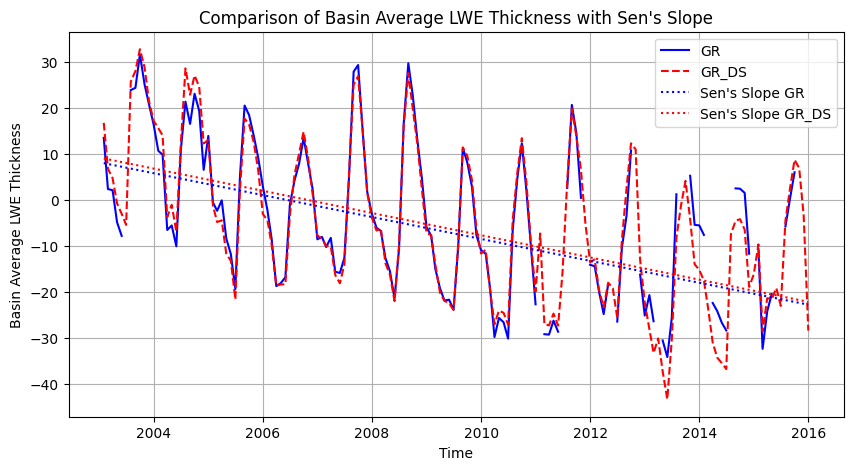

In [ ]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import theilslopes

# Compute the spatial mean (basin average)
basin_avg1 = GR["lwe_thickness"].mean(dim=["x", "y"])
basin_avg2 = corrected["corrected"].mean(dim=["x", "y"])

# Convert to Pandas DataFrame
df1 = basin_avg1.to_dataframe().dropna()
df2 = basin_avg2.to_dataframe().dropna()

# Resample to monthly means
df1 = df1.resample("M").mean()
df2 = df2.resample("M").mean()

# Merge datasets on time index
df = df1.join(df2, how="inner")
start_date = '2003-01-01'
end_date = '2015-12-31'
df = df[(df.index >= start_date) & (df.index <= end_date)]

# Extract time as numerical values for trend analysis
time_numeric = (df.index - df.index[0]).days  # Convert to days since start

# Compute Sen’s slope for each dataset
slope1, intercept1, _, _ = theilslopes(df["lwe_thickness"].dropna(), time_numeric[df["lwe_thickness"].notna()])
slope2, intercept2, _, _ = theilslopes(df["corrected"].dropna(), time_numeric[df["corrected"].notna()])

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["lwe_thickness"], label="GR", color="blue")
plt.plot(df.index, df["corrected"], label="GR_DS", linestyle="--", color="red")

# Add Sen's slope trend lines
plt.plot(df.index, slope1 * time_numeric + intercept1, color="blue", linestyle="dotted", label="Sen's Slope GR")
plt.plot(df.index, slope2 * time_numeric + intercept2, color="red", linestyle="dotted", label="Sen's Slope GR_DS")

plt.xlabel("Time")
plt.ylabel("Basin Average LWE Thickness")
plt.title("Comparison of Basin Average LWE Thickness with Sen's Slope")
plt.legend()
plt.grid()
plt.show()

# Visualize corrected

In [4]:
!pip install pymannkendall
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 62.8 MB/s eta 0:00:00


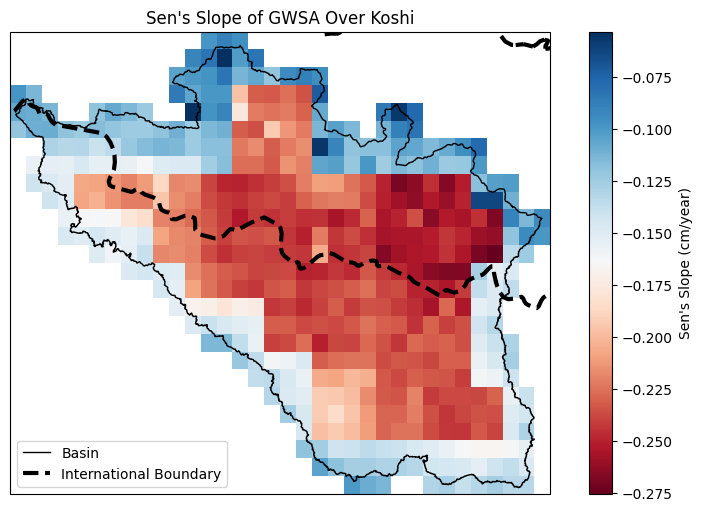

In [8]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from pymannkendall import sens_slope
import geopandas as gpd
import cartopy.crs as ccrs  # Import cartopy.crs
import cartopy.feature as cfeature
from matplotlib.lines import Line2D
GR_CR = xr.open_dataset('/content/drive/MyDrive/Thesis/RESULT/DOWNSCALED/GRACE_0.1_Corrected_CV.nc')
lwe = GR_CR['lwe_thickness_corrected']
def compute_sens_slope(data_array):
    time_dim = data_array.dims.index('time')  # Get time dimension index
    slopes = np.apply_along_axis(lambda x: sens_slope(x[~np.isnan(x)]).slope if np.any(~np.isnan(x)) else np.nan,
                                 time_dim, data_array.values)
    return xr.DataArray(slopes, coords={'y': data_array.y, 'x': data_array.x}, dims=['y', 'x'])

sens_slope_map = compute_sens_slope(lwe)
nepal_shp = gpd.read_file("/content/drive/MyDrive/Thesis/SHP/TrunkKoshi.shp")
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()}) # Use Cartopy projection


# Plot Sen's slope map with reversed color scale
mesh = ax.pcolormesh(sens_slope_map.x, sens_slope_map.y, sens_slope_map, cmap='RdBu', shading='auto',
                     transform=ccrs.PlateCarree())  # Specify transform

# Add colorbar with label
plt.colorbar(mesh, label="Sen's Slope (cm/year)")

# Overlay Nepal shapefile
nepal_shp.boundary.plot(ax=ax, edgecolor='black', linewidth=1, label="Nepal Boundary", transform=ccrs.PlateCarree()) # Specify transform


# Add international boundaries
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=3, linestyle='dashed', label="International Boundary")

legend_elements = [
    Line2D([0], [0], color='black', lw=1, label="Basin"),  # Nepal boundary (solid black)
    Line2D([0], [0], color='black', linestyle='dashed', lw=3, label="International Boundary")  # International border (dashed black)
]

# Add legend
ax.legend(handles=legend_elements, loc='lower left', frameon=True)

# Labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title("Sen's Slope of GWSA Over Koshi")
fig.savefig('/content/drive/MyDrive/Thesis/RESULT/Sens_Slope_GWSA_Koshi.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()